# 8장. 수치 시뮬레이션으로 소비자의 행동을 예측하기
- 수치 시뮬레이션: 미래 예측을 위한 선택지를 넓혀가는 수법.
- 특히 소비자 행동이 입소문과 같은 전파로 어떻게 변화하는지를 배운다. 

---
- 이번에 의뢰한 기업은 SNS를 통한 입소문을 타고 물건을 구매하는 고객이 주인 기업이다. 이 기업의 데이터를 활용해 제품의 판매를 예측해보자.  

사용하는 데이터는  
- links.csv : 재구매 고객 20명의 sns 연결 상태 (연결이 있으면 1, 아니면 0)
- links_members.csv : 모든 재구매 고객 540명의 sns 연결 상태
- info_members.csv : 모든 재구매 고객 540명의 2년간 매월 이용 현황 (이용한 경우 1, 아니면 0)

## Tech 71. 인간관계 네트워크를 가시화해보자
먼저 재구매고객 20명의 연결상태를 가시화해보자.

In [1]:
import pandas as pd
df_links = pd.read_csv('8장/links.csv')
print(df_links.shape)
df_links.head()

(20, 21)


,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


데이터는 노드0부터 노드19까지가 인덱스와 컬럼으로 들어가 있다.  
어떤 노드 A가 노드 B와 연결이 되어있다면 1, 아니면 0인 것이다. 이를 기반으로 엣지를 설정할 수 있겠지? 그래서 연결된 경우는 노드를 선으로 잇고, 아닌 경우는 잇지 않는 것이다.

In [2]:
df_links.tail()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
15,Node15,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,Node16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,Node17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18,Node18,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19,Node19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


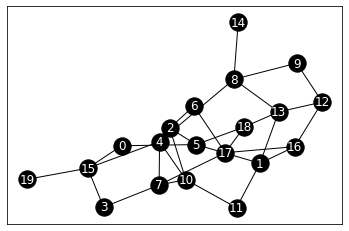

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

#객체 설정
G = nx.Graph()

#노드 설정: 노드 이름에 'Node'까지 붙이면 너무 기니까 숫자만 뽑아 0~19 이름붙임 
for i in range(1, len(df_links.index)+1): #첫 컬럼 제외 
    G.add_node(df_links.columns[i].strip('Node')) 
    
#엣지 설정: 노드 간(i, j간) 값이 1인 경우만 엣지로 연결
for i in range(len(df_links.index)):
    for j in range(len(df_links.index)):
        node_name = 'Node' + str(j)
        
        if df_links[node_name].iloc[i] == 1: #첫 컬럼은 Node가 아니기 때문에 써줌, Node i번과 Node j번 간 값이 1이면 연결 
            G.add_edge(str(i), str(j))
            
#그리기
nx.draw_networkx(G, node_color = 'k', edge_color = 'k', font_color = 'w')
plt.show()

이전 장과는 달리 이번에는 `좌표 설정`을 하지 않았다. 왜냐면 좌표 관련 데이터가 없기 때문!  
대신 `draw`가 아닌 `draw_networkx` 를 사용하는데, 얘는 좌표값이 없더라도 다른 것과 연결이 많은 노드를 자동으로 중심에 오도록 시각화해준다.  
(실행할 때마다 모양은 다른 그래프가 나올 수 있음, 하지만 연결은 제대로 된다)

In [4]:
list(range(1, len(df_links.index)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [5]:
df_links.columns[1].strip('Node')

'0'

## Tech 72. 입소문에 의한 정보 전파 모습 시각화하기
위에서 불러온 네트워크 구조를 활용해, 입소문이 전파되는 모습을 시뮬레이션한다.  
사실 재구매 고객끼리의 네트워크 시각화를 통해 어떤 고객끼리 연결이 되어있는지는 안다. 하지만 연결이 되어있다고 해서 무조건 입소문을 타진 않을것이다.  
그사람이 올린걸 못볼수도 있고, 봤더라도 자신은 안 살수도 있으니~   
그래서 **'10개의 연결 중 하나의 확률(10%의 확률)로 소문이 전파된다'**고 가정하고 입소문을 시뮬레이션해보자.

In [34]:
import numpy as np
np.random.rand() #0~1 사이에서 균일한 확률 분포로 실수 난수를 생성함. 0~1 사이의 값은 나올 확률이 모두 동일함 
                                #random.random() 과 동일하다.

0.5409833690939695

In [35]:
#입소문의 전파 여부를 확률적으로 결정. 0과 1 사이에서 어떤 값이 나올지는 그 확률이 다 동일한데, 0.1보다도 값이 작다면 1(전파됨), 아니면 0(전파 안됨) 
    #직관적으로 보기에도, 1이 나올 가능성은 낮겠지? 
def determine_link(percent): #percent는 우리가 임의로 0.1(10%) 로 넣을것임 
    rand_val = np.random.rand()
    if rand_val <= percent:
        return 1
    else: return 0

In [36]:
#입소문 시뮬레이션 
def simulate_percolation(num, list_active, percent_percolation):
    #num: 사람 수, list_active: 각 노드(사람)에 입소문이 전달되었는가? (1이면 전달됨, 0이면 전달안됨)
    #percent_percolation: 입소문을 일으킬 확률(여기선 0.1로 둔다)
    
    for i in range(num):
        if list_active[i] == 1: #어떤 사람 i의 입소문이 전달된 경우
            for j in range(num): #i랑 연결된 다른 j에 대해서.. 
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i] == 1: #혹시 i랑 j 연결이 되어있니?
                    if determine_link(percent_percolation) == 1: #그렇다면 랜덤확률이 10%보다 작니? 
                        list_active[j] = 1 #이것도 맞다면 j 너는 입소문이 전달된게 맞군. 1로 둔다.
    return list_active

In [37]:
percent_percolation = 0.1
T_NUM = 36
NUM = len(df_links.index) #20개 노드 (0~19)
list_active = np.zeros(NUM) #모두 0으로 초기화
list_active[0] = 1 #딱 첫번째 노드에만 1을 넣어줌. 얘가 입소문을 일으키면 36개월 후엔 어떻게 될까?

list_active

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [38]:
list_ts = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation) #df_links 데이터로 시뮬레이션을 * 36번(T_NUM) 해봄.
                                                                                                                                                #(그 이유는 한달에 입소문 일으킬 확률이 10%, 이를 36개월 반복한다고 보기 때문)
                                                                                                                                            #한번 할때마다 list_ts에 담기니까 list_ts엔 36개의 리스트가 있겠지?
    list_ts.append(list_active.copy())

In [39]:
list_ts

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 

In [40]:
len(list_ts)

36

In [41]:
list_ts[4]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [42]:
#위의 list_ts를 시각화해보자.

#컬러링 함수-> list_active값이 들어오면 list_color를 반환한다.
#이는 값이 1(전파된 경우)는 Red 색, 0인 경우는 Black 색을 반환함. t는 list_ts 의 몇번째 리스트를 반환할 것인지를 나타냄 (즉 몇 개월째의 list_ts가 궁금?)
def active_node_coloring(t, list_active):
    list_color = []
    for i in range(len(list_ts[t])):
        if list_ts[t][i] == 1:
            list_color.append('r')
        else:
            list_color.append('k')
    return list_color 

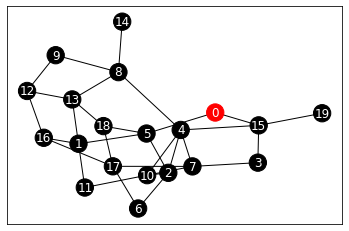

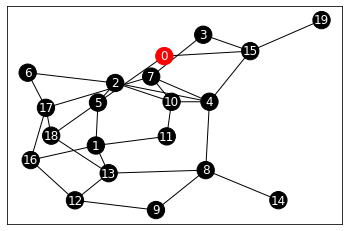

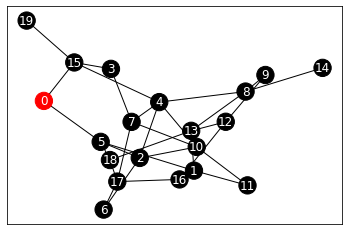

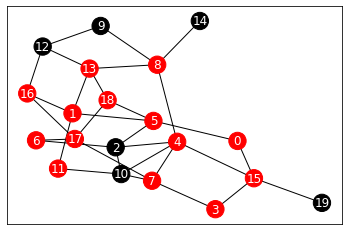

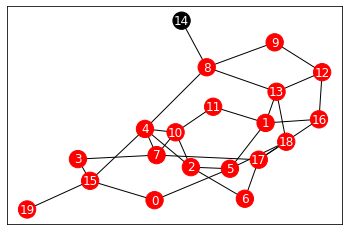

In [43]:
#시각화

#한번 1개월, 6개월, 12개월, 24개월, 36개월일 때 전파 모습을 비교해보자. 
t_list = [0, 5, 11, 23, 35]
for t in t_list:
    nx.draw_networkx(G, font_color = 'w', node_color = active_node_coloring(t, list_ts))
    plt.show()

(책에서는 3개 경우에 대해서만 봤지만 나는 임의로 5개에 대해 비교해봤다.)  
결과를 보니 1개월이 지나자 입소문이 일어난 사람은 1명, 6개월 이후는 2명이었고, 12개월 이후는 4명으로 늘어났다.  
점점 늘어나기 시작하더니 24개월 이후엔 대다수의 사람에게 전파되었고 36개월 후엔 모든 사람에게 전파됨! 입소문이 대단한 이유,,, (한달에 10%만 전파 성공해도 3년 뒤엔 모든 고객에게 전파가 되는군..!)  
랜덤함수를 썼기 때문에 책에서의 결과와 다르게 나온다 주의 - 그렇다고 함수에 seed를 설정해버리면 모두 같은 랜덤값만 출력이 되어서 불가능하다.

## Tech 73. 입소문 수의 시계열 변화를 그래프화하자
위의 결과만으로도 입소문의 위력이 얼마나 큰지를 볼 수 있다.  
하지만 모든 개월별 전파수를 그래프로 나타내기엔 36개의 그래프가 만들어지므로, 봐야 할 그래프가 너무 많다.  
단 하나의 그래프로 볼 수 없을까? -> 바로 개월별 전파수가 얼마나 되는지 그 추이 그래프(시계열 그래프)를 만들어보면 된다! 

In [44]:
#개월별 전파수는 =  list_ts가 각 개월별 전파현황을 리스트 내 리스트로 담고 있으므로, 개별 리스트의 합이 그 개월의 전파수가 된다.
print(list_ts[0], sum(list_ts[0])) #1개월차
print(list_ts[9], sum(list_ts[9])) #10개월차 전파수

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0


In [45]:
len(list_ts)

36

In [46]:
list_ts_num = []
for t in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[t]))
    


In [47]:
list_ts_num

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 8.0,
 8.0,
 10.0,
 10.0,
 12.0,
 14.0,
 14.0,
 15.0,
 15.0,
 16.0,
 17.0,
 17.0,
 17.0,
 17.0,
 18.0,
 18.0,
 18.0,
 19.0,
 19.0]

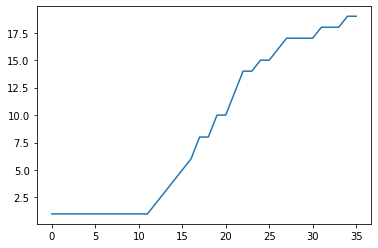

In [48]:
plt.plot(list_ts_num)
plt.show()

위 그래프를 통해, x축(개월수)이 커질수록 전파수가 크게 늘어남을 볼 수 있다. 이 그래프 결과는 당연하게도 돌릴 때마다 다른 값이 나온다.  
11개월~19개월 정도에 정체가 좀 보이긴 하지만 결국 36개월이 되면 모두에게 전파가 되고 있음을 확인 가능!

## Tech 74. 회원 수의 시계열 변화를 시뮬레이션하자 
입소문을 통해 스포츠센터의 이용상황이 어떻게 변화하는지 시뮬레이션.  
마찬가지로 확률은 임의로 설정하며, 한달 동안 확산을 할 확률은 10%, 소멸(탈퇴)할 확률은 5%라고 두자.

In [20]:
#확산과 소멸의 확률을 바탕으로 회원수의 변화를 예측해볼수 있다. 위에서와 마찬가지로 이 확률은 임의로 지정함 
def simulate_population(num, list_active, percent_percolation, percent_disappearence, df_links):
    #초기화된 list_active를 넣으면 랜덤확률로 연산후 list_active를 반환 
    
    #확산 - 앞에서와 동일 
    for i in range(num):
        if list_active[i] == 1:
            for j in range(num):
                if df_links.iloc[i][j] == 1:
                    if determine_link(percent_percolation) ==1:
                        list_active[j] = 1
                        
    #소멸
    for i in range(num):
        if determine_link(percent_disappearence) == 1: #반대로 랜덤확률이 소멸할 확률보다도 작으면 전파가 꺼지는 것(0)으로 설정 
            list_active[i] = 0
            
    return list_active 
    

In [25]:
T_NUM = 100 #100 개월 동안 어떻게 바뀔지 지켜보자.
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] =  1

In [26]:
list_ts = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, 0.1, 0.05, df_links) #임의로 확산할 확률 10%, 소멸할 확률 5%로 둠 
    list_ts.append(list_active.copy()) #시뮬레이션 과정 100번 반복해서 list_ts에 차곡차곡 쌓음 

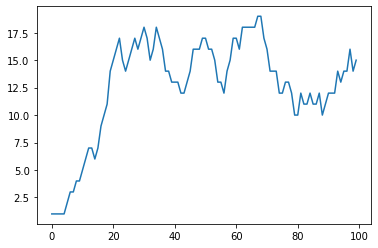

In [27]:
#아까전에 만든 코드 그대로 사용
list_ts_num = []

for t in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[t]))
    
plt.plot(list_ts_num)
plt.show()

In [28]:
list_ts[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

똑같이 df_link 데이터를 활용한다. 각 Node가 사람이라고 생각하는 것. 즉, 사람 20명에 대해, 전파가 일어나(1) 가입을 할 확률은 한달에 10%, 전파가 꺼져 탈퇴를 할 확률은 한달에 5%로 가정한다.  
시뮬레이션을 100개월 동안 진행했다(x축: 개월수.) 처음엔 단 1명만 전파 불이 켜졌었는데, 100개월을 진행하면서 결국 가입자가 20명 전원을 향해 달려가고 있다.(물론 그래프 결과는 실행시킬 때마다 바뀐다)  
이번에는 한달에 탈퇴확률이 20%로 높아지면 어떻게 되는지 확인해보자.

In [31]:
T_NUM = 100 #100 개월 동안 어떻게 바뀔지 지켜보자.
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] =  1

list_ts = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, 0.1, 0.2, df_links)
    list_ts.append(list_active.copy()) #시뮬레이션 과정 100번 반복해서 list_ts에 차곡차곡 쌓음 

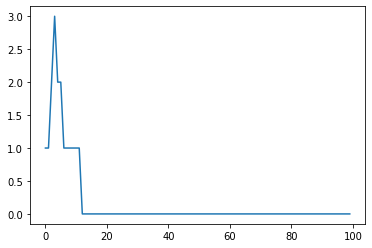

In [32]:
#아까전에 만든 코드 그대로 사용
list_ts_num = []

for t in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[t]))
    
plt.plot(list_ts_num)
plt.show()

와우,, 그래프 결과는 실행할 때마다 바뀌긴 하지만, 내 경우엔 20개월 이후엔 이용자가 0명이 되었다. ㅜㅜ  
사실 당연한 결과이다. 처음 시작이 이용자 1명인데, 탈퇴확률이 더 높으니..

## Tech 75. 파라미터 간의 상관관계를 파악하자
확산할 확률과 소멸할 확률을 조금씩 변화시키면서, 100개월이 지난다면 몇 명이나 계속 이용할지를 색으로 표시해보자.  
여기서 확률 변화는 0.05씩 바뀜(0 , 0.05, 0.1, ... ,0.9, 0.95)

---
확산과 소멸이 어떤 확률로 일어나는지는 상품이나 서비스의 성질에 따라 달라지고, 캠페인 유무에 따라 영향을 크게 받는다.  
이 상관관계를 파악하는 이유는, 이 확률이 상품(or 서비스)에 어떻게 영향을 주는지(장기적으로 봤을 때 확률에 따라 정착을 하는지, 결국 이탈하는지)를 알기 위해서이다.  
위에서 쓴것과 똑같은 데이터셋을 사용 - 20명의 재구매 고객에 대해 100개월간 지켜봤을 때 남는 회원은? (색이 노란색일수록 20명 전원에 가깝고, 파란색일수록 0명이다)  
(밑의 코드는 시간이 오래 걸리니 주의,, 체감상 15분정도 걸리는듯)

In [28]:
for i in range(20):
    print(0.05*i)

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001


In [50]:
np.linspace(0, 0.95, 20)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [29]:
T_NUM = 100
NUM_phasediagram = 20
phasediagram = np.zeros((NUM_phasediagram, NUM_phasediagram)) #20x20 행렬 

for i_p in range(NUM_phasediagram):
    for i_d in range(NUM_phasediagram):
        percent_percolation = 0.05 * i_p        #확산할 확률
        percent_disapparence = 0.05 * i_d    #소멸할 확률
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
            phasediagram[i_p][i_d] = sum(list_active)

print(phasediagram)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 15. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 15.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 12. 14.  7. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 15. 14.  0. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 17. 15. 11.  7. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 17. 14. 13.  0.  6. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 17. 11. 17. 14. 10. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 16. 17. 10. 10. 13. 11.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 16. 19. 14. 10. 12.  0. 13. 11.  0.  0.  0.  0.  0.  0.

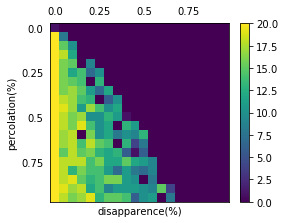

In [30]:
plt.matshow(phasediagram)
plt.colorbar(shrink=0.8) #colorbar 길이 조정 
plt.xlabel('disapparence(%)')
plt.ylabel('percolation(%)')
plt.xticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False, left=False, right=False, top=False)
plt.show()

- 그래프를 보면 알수있듯, 가장 중요한 것은 **소멸확률** 이다.
    - 왜냐, 소멸확률이 낮으면 확장확률이 어느정도 낮아도 20명 전원이 이용한다.
    - 반대로 소멸확률이 0.2를 넘어서면 확장확률이 높아도 이용자는 20명까지 증가하지 않는다.

## Tech 76. 실제 데이터를 불러오자
지금까지는 회원 20명 데이터를 갖고 시뮬레이션을 했는데, 이번에는 540명 전체 회원 데이터를 활용해서 시뮬레이션을 해보자.

In [31]:
mem_link = pd.read_csv('8장/links_members.csv')
mem_info = pd.read_csv('8장/info_members.csv')

print(mem_link.shape, mem_info.shape)
display(mem_link.head(), mem_info.head())

(540, 541) (540, 25)


,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


- mem_link 에는 회원 540명끼리의 노드 연결상태가 나와있음. 각 행과 열이 모두 Node # 이다.
- mem_info에는 24개월동안 회원 540명의 이용상태가 나와있다. 1이면 해당 달에 이용을 했고, 0이면 이용을 하지 않음

## Tech 77. 링크 수의 분포를 가시화하자
사실 앞에선 20명끼리의 분포였으니 네트워크 시각화를 할 수 있었지만, 지금은 540명이니 네트워크로 시각화하기가 쉽지 않다.  
그러니 네트워크로 표현하지 말고, `링크 수`를 가시화해서 540명이 어떤 구조를 갖고 있는지를 확인해보자.

In [32]:
NUM = len(mem_link.index) #540
array_linkNUM = np.zeros(NUM) #초기화

for i in range(NUM):
    array_linkNUM[i] = sum(mem_link["Node" + str(i)]) #각 노드번호별로 총 몇 명이랑 이어져있을까?
    
print(array_linkNUM)

[ 32. 128. 155.  44. 108.  32. 152. 135. 143.  75. 125.  96. 107. 141.
 165.  71.  92. 180.  67.  30.  79.  11. 195. 139. 175. 148. 127. 162.
  95. 125.  55. 120. 148. 114. 143.  22. 129.  56.  17.  79.  78.  78.
 159. 183.  79.  99.  36.  41. 136.  31. 119. 180. 169. 167. 124.  37.
 152.  21.  77.  55.  38.  67. 103. 103. 114. 109.  92. 122. 190.  33.
 196.  50. 165.  17. 123.  97.  19. 132.  54. 113. 106. 174. 111. 107.
 193. 117. 164.  53. 125.  67. 175.  82. 111.  94.  98. 106.  89.  28.
  98.  41.  59.  55. 146. 131.  91.  45. 136.  89. 122.  65. 110.  88.
 117.  71. 157. 112. 106. 148.  54. 127. 149. 174.  89.  65. 159.  56.
 109. 105. 133.  64. 126.  98. 118.  87.  98.  99.  45. 123.  90. 100.
  85. 133. 129.  53.  80.  35.  61. 124. 109. 101. 166.  49.  57. 128.
  65. 134.  72.  51.  91.  35.  87.  69. 109.  84.  99.  99. 115.  93.
 123.  58. 183. 117. 123.  53. 176. 121.  61.  88. 140.  99.  99. 101.
 127. 162.  92. 141.  46. 122.  73.  91.  78.  71. 171.  69. 116. 198.
 143. 

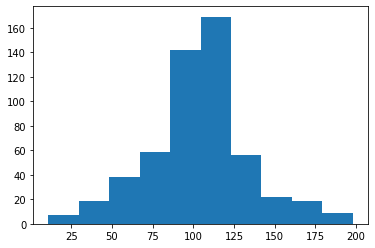

In [33]:
plt.hist(array_linkNUM, bins = 10) #, range=(0, 250))
plt.show()

그래프를 보면 링크 개수가 약 100에 집중된 정규분포에 가깝다. 540명 각각 몇명과 연결되었니? 를 봤을때  
100명 미만으로 연결된 사람은 적고, 약 100여 명과 연결된 사람이 대다수, 그리고 100명 넘게 연결된 사람은 적다. 100 중심의 정규분포 형태이다.  

---
- 스케일 프리형 : 소수의 연결을 많이 갖고 있는 사람이 허브가 됨. 멱 법칙에 가까워짐.   
또한 링크를 많이 갖고있는 소수의 사람이 입소문을 퍼뜨리지 않으면 입소문이 잘 퍼지지 않음.  
- 이 분포는 대다수의 노드가 어느 정도(100명)의 링크를 갖고 있는 정규분포 형태를 따른다. 그러니 급격히 입소문이 퍼지진 않지만, 소수의 인플루언서에 의존하지 않고 입소문이 퍼지기 쉽다고 볼 수 있음

## Tech 78. 시뮬레이션을 위해 파라미터를 추정하기
정확도 높은 시뮬레이션을 위해선 파라미터를 추정해야 한다. 여기서 사용하는 파라미터는 2개 : 확산 확률, 소멸 확률   

--- 
- 소멸의 경우는 노드가 연결되어있지 않아도 상관없다고 본다.왜냐면 노드 A랑 연결이 되어있기 때문에 t 시점엔 이용하다가 t+1 엔 이용을 안하는게 아니잖아?  
그래서 소멸은 그냥 개별 노드에 대해 t엔 연결이 되어있다가 -> t+1엔 연결이 끊긴 비율을 계산하면 됨  

- 하지만 확산(전파)는 개별 노드가 t엔 연결이 안되어있는데 -> t+1엔 연결이 될 비율로 계산할 수 없음. 왜냐? 갑자기 연결된 이유가 너무 많으니까,, 정말로 전파가 되어 연결이 된건지 모름 
    - 그러니 => "왜 연결이 되었나? 전파가 되었기 때문! "이 조건 하에선 계산이 된다.
- 책에 너무 설명이 빈약한듯,,

In [34]:
NUM = len(mem_info.index) #540
T_NUM = len(mem_info.columns)-1 #24 (Unnamed가 있어서)

In [35]:
#소멸확률 추정: 노드가 t 시점에는 이용했지만(1) 바로 다음인 t+1 시점에선 이용하지 않을(0일) 확률 
count_active = 0
count_active_to_inactive = 0

for t in range(1, T_NUM):
    for i in range(NUM):
        if (mem_info.iloc[i][t] == 1): #만약 특정 t 시점에서 Node i가 이용한 적이 있다면?
            count_active += 1
            if (mem_info.iloc[i][t+1] == 0): #그런데 t+1 시점에는 이용한 적이 없다면?
                count_active_to_inactive += 1
                
print(count_active_to_inactive/count_active)

0.10147163541419416


In [36]:
mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
mem_link.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
#확산확률 추정: 노드가 t 시점에는 이용하지 않았지만(0) 바로 다음 t+1 시점에선 이용할(1일) 확률
    # 이를 계산하는건 매우 까다롭다. 위와 같은 케이스가 아닌 게, 이렇게 입소문이 전파될(확산될) 확률이 어떤 확률에 근거해서 발생하는 게 아니기 때문이다.
    #또한 노드의 링크 수와 관계없이 변화는 발생하기 때문에, 반드시 비활성이나 활성의 개수를 세고 그 비율로부터 확률을 추정할 수는 없다.
    
    
#--------------그래서 이렇게 추정!------------------- 노드 A와 연결되어 있는 노드 A' 에서 이용을 안하다 다음 달 이용했다면 전파가 되었다고 가정하자.
 # 이렇게 보면 A' 에 대해,(A랑 연결됨)
    #count_link는 t 시점엔 방문을 안 한 횟수
    #count_link_to_active 는 t+1 시점에 방문을 한 횟수 (=> A랑 연결이 되어있기 때문에 A'이 방문 안했다가 방문한 것으로 봄)
    #그래서 count_link_to_active를 count_link로 나누면 되겠지!
    
count_link = 0 
count_link_to_active = 0

#------------ t 시점에 이용한적 있는 노드 A: df_link_t 
#----------이러한 A들과 연결돼있는 노드 A' : df_link_temp (얘는 t 시점엔 0 이었다가, t+1 시점엔 전파가 되어 1이 되었는지를 계산하자 )
#-----어차피 mem_info , mem_link의 인덱스는 노드번호이기 때문에 temp_flag_count 값을 NUM 값으로 초기화시켜도된다. 전부 540개로 동일!! 
# 그래서 temp_flag_count 의 각 원소는 노드라고 보면 됨, 개별 노드가 t시점엔 이용 안했다가 t+1 시점엔 이용하게 된다면 1로 바뀐다. 
#ㄴ 어! 근데 그럼 temp_flag_count 값이 안 정확한거 아닌가?? 만약 node2가 node0 랑도 연결돼서 t+1에 1이됐고, node 43이랑도 연결돼서 t+1에 1이 되었으면
    #얼마나 전파가 되었는지 모르는거 아냐? 라고 할수있는데 맞다. 근데 temp_flag_count값이 중요한 값이 아니고, 그냥 이 노드가 1이 되어본적이 있냐? 가 궁금한거라서 상관없음
    #중요한건 count_link, count_link_to_active 임 .

for t in range(T_NUM -1): #0~23 컬럼명 맞추기 위함, 각 t에 대해..
    df_link_t = mem_info[mem_info[str(t)] == 1] #개별 t가 1인 노드만 뽑아서 새로운 데이터프레임 df_link_t 생성 (예를 들어 t가 0이라고 해보자..)
                                                                                            #개별 t라는 기간에 방문한 적이 있는 노드들 
    temp_flag_count = np.zeros(NUM) #540명 노드의 flag값. 현재는 모두 0으로 초기화되어 있으며, 만일 t 기간엔 방문안했다 t+1에 방문을 했다면 
                                                                        #기존의 A 노드와 연결이 되어 있기 때문이라 보고, 이를 1로 바꾼다.
    
    for i in range(len(df_link_t.index)): #그리고 df_link_t의 개별 노드 하나씩에 대해서..
        df_link_temp = mem_link[mem_link['Node' + str(df_link_t.index[i])] == 1] #이번엔 t기간에 방문한 노드(A라 하면)가 연결된 노드들(A'라 하자)로  df_link_temp 생성 
        
        for j in range(len(df_link_temp.index)):
            if (mem_info.iloc[df_link_temp.index[j]][str(t)] == 0): #A' 들이 개별 t라는 기간에 방문을 안했니?(그럼 특정기간 t에 A는 방문했는데, 얘랑 연결된 A'는 방문을 안했단 거군..)
               
                if (temp_flag_count[df_link_temp.index[j]] == 0): #그리고 A' 들이 temp_flag_count 값이 0이니? (디폴트값)
                    count_link += 1 #그렇다면 count_link를 1씩 추가
    
                if (mem_info.iloc[df_link_temp.index[j]][str(t+1)] == 1): #그렇다면 A'들이 t+1 기간엔 방문을 했니? (그럼 t 기간엔 안했는데 t+1 시점엔 한거네?)
                    if (temp_flag_count[df_link_temp.index[j]] == 0): #그리고 A' 들이 temp_flag_count 값이 0이니? (디폴트값)
                        temp_flag_count[df_link_temp.index[j]] = 1 #그렇다면 A' 노드 번호인 temp_flag_count 값은 1로 변경하고
                        count_link_to_active += 1 #count_link_to_active를 1씩 추가

                    
print(count_link_to_active/count_link)

0.039006364196263604


In [39]:
print(temp_flag_count)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [40]:
print(sum(temp_flag_count))
print(count_link_to_active, count_link)

52.0
1330 34097


## Tech 79. 실제 데이터와 시뮬레이션을 비교하자.
앞서 tech 78에서 소멸확률과 확산확률을 추정했다. 파라미터 값을 구했으니 이를 넣어서 시뮬레이션을 돌려보자.  
시뮬레이션 코드는 tech 74에서 만든 것과 동일

In [41]:
#각각 앞에서 구한 확산확률, 소멸확률
p_percent = count_link_to_active/count_link 
d_percent = count_active_to_inactive/count_active

print(p_percent, d_percent)

0.039006364196263604 0.10147163541419416


In [42]:
## 시뮬레이션 - df_link -> mem_link, 그리고 확산/소멸확률 파라미터 바꾸기  (밑의 for문은 시간이 오래걸리니 주의.. 41분)

T_NUM = 24 #24 개월 동안 어떻게 바뀔지 지켜보자.
NUM = len(mem_link.index) # 540명 
list_active = np.zeros(NUM)
list_active[0] =  1 #노드0가 입소문 퍼뜨리기 시작! 

list_ts = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, p_percent , d_percent , mem_link) #확산, 소멸확률 파라미터 지정 
    list_ts.append(list_active.copy()) #시뮬레이션 과정 24번에 걸쳐 list_ts에 차곡차곡 쌓음 

In [43]:
list_ts

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 

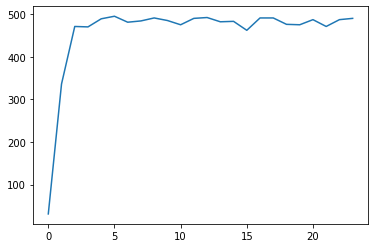

In [44]:
#아까전에 만든 코드 그대로 사용
list_ts_num = []

for t in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[t]))
    
plt.plot(list_ts_num) #총 24개월을 거치며 전파된 노드의 수 시각화 
plt.show()

### 위의 시뮬레이션 결과와 실제를 비교한 그래프를 그리자.
우리는 이미 실제 결과를 알고있다! `mem_link`는 회원끼리 연결되어있는지의 데이터지만,  
`mem_info` 데이터는 회원(노드)별로 진짜로 방문했는지? 를 24개월 기간동안 알고 있잖아~ 그래서 각 개월마다 전파된 노드수의 합계를 구할수있음!

In [45]:
mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [59]:
list_ts_real = []

for t in range(0, 24):
    t_sum = len(mem_info[mem_info[str(t)] == 1].index)
    list_ts_real.append(t_sum)
    
print(list_ts_real)

[1, 2, 5, 17, 78, 314, 438, 465, 477, 465, 466, 479, 476, 473, 479, 480, 477, 469, 479, 491, 464, 464, 467, 482]


In [73]:
#위 방법 말고 간단한 방법이 있음 
list_ts_real = list(np.sum(mem_info.iloc[:,1:], axis=0))
print(list_ts_real)

[1.0, 2.0, 5.0, 17.0, 78.0, 314.0, 438.0, 465.0, 477.0, 465.0, 466.0, 479.0, 476.0, 473.0, 479.0, 480.0, 477.0, 469.0, 479.0, 491.0, 464.0, 464.0, 467.0, 482.0]


In [47]:
list(range(0, 23))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22]

In [53]:
list_ts_real

[1,
 2,
 5,
 17,
 78,
 314,
 438,
 465,
 477,
 465,
 466,
 479,
 476,
 473,
 479,
 480,
 477,
 469,
 479,
 491,
 464,
 464,
 467]

In [58]:
import numpy as np
list(np.sum(mem_info.iloc[:,1:], axis=0))

[1.0,
 2.0,
 5.0,
 17.0,
 78.0,
 314.0,
 438.0,
 465.0,
 477.0,
 465.0,
 466.0,
 479.0,
 476.0,
 473.0,
 479.0,
 480.0,
 477.0,
 469.0,
 479.0,
 491.0,
 464.0,
 464.0,
 467.0,
 482.0]

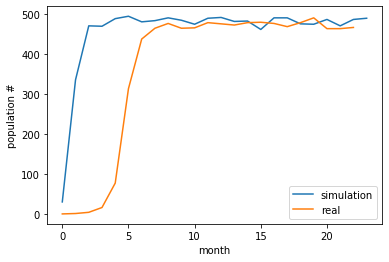

In [49]:
#이제 시뮬레이션 결과 list_ts_num , 실제결과 list_ts_real 을 비교한 그래프를 그려보자.
plt.plot(list_ts_num, label = 'simulation')
plt.plot(list_ts_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population #')
plt.legend(loc = 'lower right')
plt.show()

- 결과를 보면 시뮬레이션에 따른 개월별 전파 합계(이용자 수) 와, 실제 결과가 비슷하게 움직이고 있다.
- 하지만 주의할 점! **어느 지점**에서 사용자가 급격히 증가하는지의 경향은 파악할 수 있으나,
    - 프로그램 난수의 영향으로 **증가하는 시간대/시기에 오차가 생긴다**. 그래서 이 점을 꼭 알아두고, 
    - 이를 방지하기 위해선 여기선 시뮬레이션을 1번 했으나 이를 여러 번 돌린 평균값으로 최종 시뮬레이션 결과를 내든가 해야 한다.

## Tech 80. 시뮬레이션으로 미래를 예측해보자
앞에서는 시뮬레이션을 24개월에 대해 해보았고, 그래서 실제값과 비교를 해볼수 있었다.  
이번에는 시뮬레이션을 36개월에 대해 해보자. 아직 값이 없는 미래를 예측해보자.

In [50]:
## 시뮬레이션 - T_NUM만 변경  (밑의 for문은 시간이 오래걸리니 주의.. )

T_NUM = 36 #36 개월 동안 어떻게 바뀔지 지켜보자.
NUM = len(mem_link.index) # 540 
list_active = np.zeros(NUM)
list_active[0] =  1 #노드0가 입소문 퍼뜨리기 시작! 

list_ts = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, p_percent , d_percent , mem_link) 
    list_ts.append(list_active.copy()) 

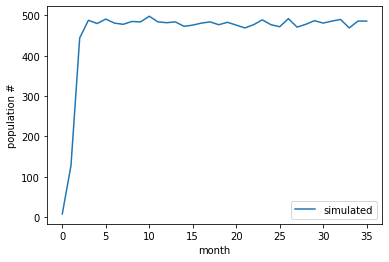

In [51]:
#아까전에 만든 코드 그대로 사용
list_ts_num = []

for t in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[t]))
    
plt.plot(list_ts_num, label = 'simulated')
plt.xlabel('month')
plt.ylabel('population #')
plt.legend(loc ='lower right')
plt.show()

결과를 보면 24개월 이후엔 회원수에 별다른 변화가 없이 지속됨을 알 수 있다.  
중요한 것은 **회원수가 급격히 감소하지 않고 지속된다** 는 것이다.  

이 결과가 당연할 수 있겠지만, 현실로 나타나기 전까진 정확한지 알 수 없다.  
직관적으로 봤을 때 그렇겠지~ 라고 하더라도 직접 분석을 해서 예측을 해봤기에 미래가 이럴 것이라고 추정하고, 주장할 수 있는 것이다.   
그런 의미에서 `시뮬레이션`은 중요한 기법이다.  
책의 조언: 수치 시뮬레이션은 8장에서 배운 것처럼, 실제 데이터 분석과 병용하면 위력을 발휘할 수 있으니, 꼭 현장에서 응용해 보세요!

 
지금 1장~ 8장까지 배운 내용을 활용하면,  
- 실제 현장에서 데이터 분석으로 어떻게 결과를 내는지
- 데이터 분석을 활용해 어떻게 개선할 것인지
를 알 수 있다.  

---
여기까지만 알아도 되겠지만, 더 발전하고 싶다면!  
그 다음 남은 9장과 10장은 이 책의 마지막 [4부: 발전 편] 의 내용이다. 9장은 이미지 처리, 10장은 텍스트 처리의 내용을 담고 있다.  
AI(인공지능)을 얘기할 때면 언제나 이미지와 텍스트 자연어 처리에 대한 내용은 빠지지 않는다. 그만큼 중요한 기술이지만,  
**이를 현장에서 어떻게 응용하는지에 대한 설명은 별로 없다.**  그래서 어떻게 현장에서 응용할 것인가? 에 대해 설명한다. 